D:\IDLE\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Á≥ªÁªüÊâæ‰∏çÂà∞ÊåáÂÆöÁöÑÊñá‰ª∂„ÄÇ
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\IDLE\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "D:\IDLE\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "D:\IDLE\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "D:\IDLE\lib\subprocess.py", line 1420, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


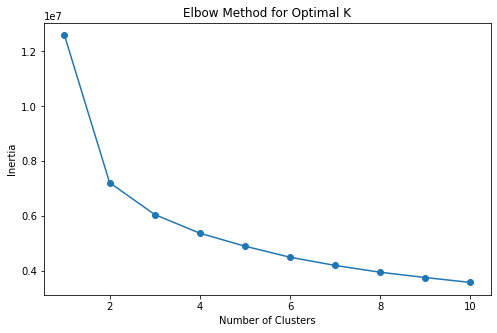

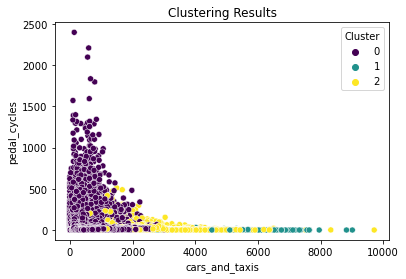

count_point_id direction_of_travel  year count_date  hour  region_id  \
0              51                   N  2004 2004-05-21     7          1   
1              51                   N  2004 2004-05-21     8          1   
2              51                   N  2004 2004-05-21     9          1   
3              51                   N  2004 2004-05-21    10          1   
4              51                   N  2004 2004-05-21    11          1   

  region_name region_ons_code  local_authority_id local_authority_name  ...  \
0  South West       E12000009                   1      Isles of Scilly  ...   
1  South West       E12000009                   1      Isles of Scilly  ...   
2  South West       E12000009                   1      Isles of Scilly  ...   
3  South West       E12000009                   1      Isles of Scilly  ...   
4  South West       E12000009                   1      Isles of Scilly  ...   

  LGVs HGVs_2_rigid_axle HGVs_3_rigid_axle HGVs_4_or_more_rigid_axle  \
0   13                 0                 0                         0   
1   13                 7                 7                         0   
2   17                 5                 0                         0   
3    4                 4                 0                         0   
4   14                 6                 0                         0   

  HGVs_3_or_4_articulated_axle HGVs_5_articulated_axle  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   HGVs_6_articulated_axle  all_HGVs  all_motor_vehicles  Cluster  
0                      0.0       0.0                19.0        0  
1                      0.0      14.0                44.0        0  
2                      0.0       5.0                45.0        0  
3                      0.0       4.0                41.0        0  
4                      0.0       6.0                41.0        0  

[5 rows x 36 columns]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ËØªÂèñExcelÊñá‰ª∂
df = pd.read_excel("D:\downloadinternet\dft_traffic_counts_raw_counts.xlsx", sheet_name='dft_traffic_counts_raw_counts')

# ÈÄâÊã©Êï∞ÂÄºÂûãÂàóËøõË°åËÅöÁ±ª
numeric_columns = [
    'cars_and_taxis','pedal_cycles',
    'buses_and_coaches', 'LGVs', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle',
    'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle',
    'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'all_HGVs', 'all_motor_vehicles'
]
data = df[numeric_columns]

# Â§ÑÁêÜÁº∫Â§±ÂÄºÔºàÂ°´ÂÖÖ‰∏∫ÂàóÂùáÂÄºÔºâ
data = data.fillna(data.mean())

# Ê†áÂáÜÂåñÊï∞ÊçÆ
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Á°ÆÂÆöÊúÄ‰Ω≥ËÅöÁ±ªÊï∞ (ËÇòÈÉ®Ê≥ïÂàô)
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# ÈÄâÊã©ÂêàÈÄÇÁöÑKÂÄºÔºàÂÅáËÆæËÇòÈÉ®Ê≥ïÂàôÈÄâÂèñ K=3Ôºâ
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# ÂèØËßÜÂåñËÅöÁ±ªÁªìÊûúÔºàÂèñÂâç‰∏§ÂàóÊï∞ÂÄºÊï∞ÊçÆËøõË°åÊï£ÁÇπÂõæÂ±ïÁ§∫Ôºâ
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=df['Cluster'], palette='viridis')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title('Clustering Results')
plt.show()

# ÊòæÁ§∫Â∏¶ÊúâËÅöÁ±ªÊ†áÁ≠æÁöÑÊï∞ÊçÆ
df.head()


In [3]:
distribution = df['Cluster'].value_counts()
print("Cluster Distribution:")
print(distribution)

Cluster Distribution:
0    823168
2    171662
1     53745
Name: Cluster, dtype: int64


In [4]:
from sklearn.metrics import calinski_harabasz_score

for k in range(2, 6):  # Â∞ùËØï K=2 Âà∞ K=5
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(data_scaled)
    ch_score = calinski_harabasz_score(data_scaled, clusters)
    print(f'K={k}, Calinski-Harabasz Score: {ch_score:.2f}')

K=2, Calinski-Harabasz Score: 778025.03
K=3, Calinski-Harabasz Score: 563933.75
K=4, Calinski-Harabasz Score: 467352.80
K=5, Calinski-Harabasz Score: 409517.58


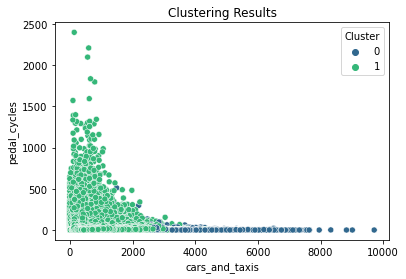

count_point_id direction_of_travel  year count_date  hour  region_id  \
0              51                   N  2004 2004-05-21     7          1   
1              51                   N  2004 2004-05-21     8          1   
2              51                   N  2004 2004-05-21     9          1   
3              51                   N  2004 2004-05-21    10          1   
4              51                   N  2004 2004-05-21    11          1   

  region_name region_ons_code  local_authority_id local_authority_name  ...  \
0  South West       E12000009                   1      Isles of Scilly  ...   
1  South West       E12000009                   1      Isles of Scilly  ...   
2  South West       E12000009                   1      Isles of Scilly  ...   
3  South West       E12000009                   1      Isles of Scilly  ...   
4  South West       E12000009                   1      Isles of Scilly  ...   

  LGVs HGVs_2_rigid_axle HGVs_3_rigid_axle HGVs_4_or_more_rigid_axle  \
0   13                 0                 0                         0   
1   13                 7                 7                         0   
2   17                 5                 0                         0   
3    4                 4                 0                         0   
4   14                 6                 0                         0   

  HGVs_3_or_4_articulated_axle HGVs_5_articulated_axle  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   HGVs_6_articulated_axle  all_HGVs  all_motor_vehicles  Cluster  
0                      0.0       0.0                19.0        1  
1                      0.0      14.0                44.0        1  
2                      0.0       5.0                45.0        1  
3                      0.0       4.0                41.0        1  
4                      0.0       6.0                41.0        1  

[5 rows x 36 columns]

In [7]:
# ÈÄâÊã©ÂêàÈÄÇÁöÑKÂÄºÔºàÂÅáËÆæËÇòÈÉ®Ê≥ïÂàôÈÄâÂèñ K=3Ôºâ
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# ÂèØËßÜÂåñËÅöÁ±ªÁªìÊûúÔºàÂèñÂâç‰∏§ÂàóÊï∞ÂÄºÊï∞ÊçÆËøõË°åÊï£ÁÇπÂõæÂ±ïÁ§∫Ôºâ
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=df['Cluster'], palette='viridis')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title('Clustering Results')
plt.show()

# ÊòæÁ§∫Â∏¶ÊúâËÅöÁ±ªÊ†áÁ≠æÁöÑÊï∞ÊçÆ
df.head()

In [8]:
distribution = df['Cluster'].value_counts()
print("Cluster Distribution:")
print(distribution)

Cluster Distribution:
1    906811
0    141764
Name: Cluster, dtype: int64


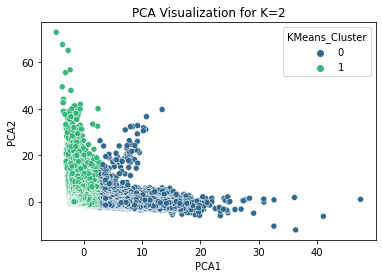

In [9]:
from sklearn.decomposition import PCA
import seaborn as sns

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['KMeans_Cluster'], palette='viridis')
plt.title('PCA Visualization for K=2')
plt.show()


D:\IDLE\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


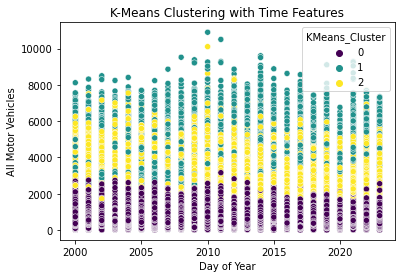

K-Means Cluster Distribution:
0    821674
2    172731
1     54170
Name: KMeans_Cluster, dtype: int64


count_point_id direction_of_travel  year count_date  hour  region_id  \
0              51                   N  2004 2004-05-21     7          1   
1              51                   N  2004 2004-05-21     8          1   
2              51                   N  2004 2004-05-21     9          1   
3              51                   N  2004 2004-05-21    10          1   
4              51                   N  2004 2004-05-21    11          1   

  region_name region_ons_code  local_authority_id local_authority_name  ...  \
0  South West       E12000009                   1      Isles of Scilly  ...   
1  South West       E12000009                   1      Isles of Scilly  ...   
2  South West       E12000009                   1      Isles of Scilly  ...   
3  South West       E12000009                   1      Isles of Scilly  ...   
4  South West       E12000009                   1      Isles of Scilly  ...   

  HGVs_2_rigid_axle HGVs_3_rigid_axle HGVs_4_or_more_rigid_axle  \
0                 0                 0                         0   
1                 7                 7                         0   
2                 5                 0                         0   
3                 4                 0                         0   
4                 6                 0                         0   

  HGVs_3_or_4_articulated_axle HGVs_5_articulated_axle  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

  HGVs_6_articulated_axle  all_HGVs  all_motor_vehicles  month  KMeans_Cluster  
0                     0.0       0.0                19.0      5               0  
1                     0.0      14.0                44.0      5               0  
2                     0.0       5.0                45.0      5               0  
3                     0.0       4.0                41.0      5               0  
4                     0.0       6.0                41.0      5               0  

[5 rows x 37 columns]

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# ËØªÂèñExcelÊñá‰ª∂
df = pd.read_excel("D:\downloadinternet\dft_traffic_counts_raw_counts.xlsx", sheet_name='dft_traffic_counts_raw_counts')

# ÈÄâÊã©Êï∞ÂÄºÂûãÂàóËøõË°åËÅöÁ±ªÔºåÂπ∂ÂºïÂÖ•Êó∂Èó¥ÁâπÂæÅ
df['count_date'] = pd.to_datetime(df['count_date'])  # ËΩ¨Êç¢‰∏∫Êó•ÊúüÊ†ºÂºè
df['year'] = df['count_date'].dt.year  # ÊèêÂèñÂπ¥‰ªΩ
df['month'] = df['count_date'].dt.month  # ÊèêÂèñÊúà‰ªΩ


# ÈáçÊñ∞ÈÄâÊã©Êï∞ÂÄºÂûãÂàó
data_columns = [
     'cars_and_taxis','pedal_cycles',
    'buses_and_coaches', 'LGVs', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle',
    'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle',
    'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'all_HGVs', 'all_motor_vehicles',
    'year', 'month'
]
data = df[data_columns]

# Â§ÑÁêÜÁº∫Â§±ÂÄºÔºàÂ°´ÂÖÖ‰∏∫ÂàóÂùáÂÄºÔºâ
data = data.fillna(data.mean())

# Ê†áÂáÜÂåñÊï∞ÊçÆ
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# ËøêË°å K-Means ËÅöÁ±ª
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

# ÂèØËßÜÂåñ K-Means ÁªìÊûú
sns.scatterplot(x=df['year'], y=df['all_motor_vehicles'], hue=df['KMeans_Cluster'], palette='viridis')
plt.xlabel('Day of Year')
plt.ylabel('All Motor Vehicles')
plt.title('K-Means Clustering with Time Features')
plt.show()

# ÁªüËÆ°ÂêÑÁ∞áÊï∞Èáè
print("K-Means Cluster Distribution:")
print(df['KMeans_Cluster'].value_counts())

# ÊòæÁ§∫Â∏¶Êúâ KMeans ËÅöÁ±ªÊ†áÁ≠æÁöÑÊï∞ÊçÆ
df.head()


In [23]:
from sklearn.metrics import calinski_harabasz_score

for k in range(2, 5):  # Â∞ùËØï K=2 Âà∞ K=5
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(data_scaled)
    ch_score = calinski_harabasz_score(data_scaled, clusters)
    print(f'K={k}, Calinski-Harabasz Score: {ch_score:.2f}')

K=2, Calinski-Harabasz Score: 603739.91
K=3, Calinski-Harabasz Score: 420295.29
K=4, Calinski-Harabasz Score: 338380.34


CH Score after adding time features: 420295.29


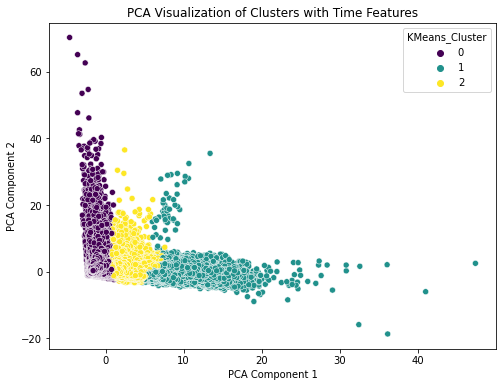

In [24]:
och_score = calinski_harabasz_score(data_scaled, df['KMeans_Cluster'])
print(f'CH Score after adding time features: {och_score:.2f}')

# ËøõË°å PCA ÈôçÁª¥Âπ∂ÂèØËßÜÂåñ
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
df['PCA1'] = data_pca[:, 0]
df['PCA2'] = data_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['KMeans_Cluster'], palette='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Clusters with Time Features')
plt.show()

‚ùå Êó∂Èó¥ÂèòÈáèÊú™ÊòéÊòæÊèêÂçáËÅöÁ±ªÊïàÊûú
CH ÊåáÊï∞‰∏ãÈôçÔºåËØ¥ÊòéÊó∂Èó¥ÁâπÂæÅ ÂèØËÉΩÊ≤°ÊúâÂ¢ûÂä†ÊúâÊïà‰ø°ÊÅØÔºåÂèçËÄåËÆ© K-Means ÁöÑÁ∞áÂèòÂæóÊõ¥ÈöæÂå∫ÂàÜ„ÄÇ
‰ªéÂõæÂÉèÊù•ÁúãÔºåK-Means ‰ªçÁÑ∂‰∏ªË¶Å‰æùÊçÆÊµÅÈáèÂ§ßÂ∞èËÅöÁ±ªÔºåËÄå‰∏çÊòØÊó∂Èó¥Ê®°Âºè„ÄÇ
üëâ ÂèØËÉΩÁöÑËß£Èáä

Êó∂Èó¥ÁâπÂæÅÔºàyear, month, dayÔºâÂèØËÉΩ‰∏çÂ¶Ç is_weekend„ÄÅhour ËøôÊ†∑Êõ¥ÁªÜÁ≤íÂ∫¶ÁöÑÊó∂Èó¥ÁâπÂæÅÊúâÁî®„ÄÇ
Â¶ÇÊûúÊµÅÈáèÊ®°ÂºèÊú¨Ë∫´Â∑≤ÁªèÂèóÊó∂Èó¥ÂΩ±ÂìçÔºåÈÇ£‰πà K-Means ÂèØËÉΩÂ∑≤ÁªèÈÄöËøáÊµÅÈáèÁâπÂæÅÈöêÂºèÂú∞Â≠¶‰π†Âà∞‰∫ÜÊó∂Èó¥‰ø°ÊÅØ„ÄÇ
K-Means Êõ¥ÊìÖÈïøÂü∫‰∫éÊï∞ÂÄºÂûãÁâπÂæÅÔºàÂ¶ÇÊµÅÈáèÔºâÊù•ÊâæËÅöÁ±ªÔºåËÄåÊó∂Èó¥‰ø°ÊÅØÊú¨Ë¥®‰∏äÂèØËÉΩÈúÄË¶ÅÂè¶‰∏ÄÁßçÂ§ÑÁêÜÊñπÂºèÔºàÂ¶ÇÊó∂Â∫èÂàÜÊûêÔºâ